In [1]:
# Import libraries
import pandas as pd
import zipfile, os
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
plt.rcParams['figure.figsize'] = 15, 6            #agar semua plot ukurannya sama
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df_beras = pd.read_csv('../../csv/Beras.csv')
df_beras

,Tanggal,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Harga Beras Penggilingan,Produksi Beras,Harga Beras,UMP,BBM Solar,Tingkat Konsumsi
0,2021-03-15,10,4000,4150,5050,9465,14419,11200,4960,9600,17161
1,2021-03-16,10,3850,4100,4740,9360,14419,11200,4960,9600,17161
2,2021-03-17,10,4160,4230,4950,9400,14419,11200,4960,9600,17161
3,2021-03-18,10,4120,4190,4730,9340,14419,11200,4960,9600,17161
4,2021-03-19,10,4190,4290,4990,9410,14419,11200,4960,9600,17161
...,...,...,...,...,...,...,...,...,...,...,...
673,2023-12-21,30,6770,6850,7980,13100,14391,14000,5444,6800,17598
674,2023-12-22,30,6600,6760,8050,13095,14391,14000,5444,6800,17598
675,2023-12-27,30,6620,6760,8030,13120,14391,14000,5444,6800,17598
676,2023-12-28,30,6650,6760,8020,13120,14391,14000,5444,6800,17598


In [3]:
# df_beras['Komoditas'] = pd.to_datetime(df_beras['Komoditas'], format='%d/ %m/ %Y')
df_beras.set_index('Tanggal', inplace=True)
#check datatype of index
df_beras.index

Index(['2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19',
       '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
       ...
       '2023-12-14', '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
       '2023-12-21', '2023-12-22', '2023-12-27', '2023-12-28', '2023-12-29'],
      dtype='object', name='Tanggal', length=678)

In [4]:
df_beras

,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Harga Beras Penggilingan,Produksi Beras,Harga Beras,UMP,BBM Solar,Tingkat Konsumsi
Tanggal,,,,,,,,,,
2021-03-15,10,4000,4150,5050,9465,14419,11200,4960,9600,17161
2021-03-16,10,3850,4100,4740,9360,14419,11200,4960,9600,17161
2021-03-17,10,4160,4230,4950,9400,14419,11200,4960,9600,17161
2021-03-18,10,4120,4190,4730,9340,14419,11200,4960,9600,17161
2021-03-19,10,4190,4290,4990,9410,14419,11200,4960,9600,17161
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,30,6770,6850,7980,13100,14391,14000,5444,6800,17598
2023-12-22,30,6600,6760,8050,13095,14391,14000,5444,6800,17598
2023-12-27,30,6620,6760,8030,13120,14391,14000,5444,6800,17598


In [5]:
df_beras = df_beras.astype('float')
# df_beras = df_beras.drop(columns=['Stok GKG Tingkat Penggilingan', 'Stok Beras Tingkat Penggilingan'])
df_beras

,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Harga Beras Penggilingan,Produksi Beras,Harga Beras,UMP,BBM Solar,Tingkat Konsumsi
Tanggal,,,,,,,,,,
2021-03-15,10.0,4000.0,4150.0,5050.0,9465.0,14419.0,11200.0,4960.0,9600.0,17161.0
2021-03-16,10.0,3850.0,4100.0,4740.0,9360.0,14419.0,11200.0,4960.0,9600.0,17161.0
2021-03-17,10.0,4160.0,4230.0,4950.0,9400.0,14419.0,11200.0,4960.0,9600.0,17161.0
2021-03-18,10.0,4120.0,4190.0,4730.0,9340.0,14419.0,11200.0,4960.0,9600.0,17161.0
2021-03-19,10.0,4190.0,4290.0,4990.0,9410.0,14419.0,11200.0,4960.0,9600.0,17161.0
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,30.0,6770.0,6850.0,7980.0,13100.0,14391.0,14000.0,5444.0,6800.0,17598.0
2023-12-22,30.0,6600.0,6760.0,8050.0,13095.0,14391.0,14000.0,5444.0,6800.0,17598.0
2023-12-27,30.0,6620.0,6760.0,8030.0,13120.0,14391.0,14000.0,5444.0,6800.0,17598.0


In [6]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=3):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [7]:
WINDOW_SIZE = 3
X, y = df_to_X_y(df_beras['Harga Beras'], WINDOW_SIZE)
X.shape, y.shape

((675, 3, 1), (675,))

In [8]:
#use minmaxscaler to scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# X = scaler.fit_transform(X.reshape(675, 3))
# y = scaler.fit_transform(y.reshape(-1,1))
# df5_scaled = pd.DataFrame(df5_scaled, index=df_imputed.index, columns=df_imputed.columns)
# df5_scaled = pd.DataFrame(df5_scaled, columns=df_imputed.columns)

y

array([11200., 11200., 11200., 11200., 11200., 11200., 11200., 11200.,
       11200., 11200., 11200., 11200., 11200., 11200., 11200., 11200.,
       11200., 11200., 11200., 11200., 11200., 11200., 11200., 11200.,
       11200., 11200., 11200., 11200., 11200., 11200., 11200., 11200.,
       11200., 11200., 11200., 11200., 11200., 11200., 11200., 11200.,
       11200., 11200., 11200., 11200., 11200., 11200., 11200., 11200.,
       11200., 11200., 11200., 11200., 11200., 11200., 11200., 11200.,
       11200., 11200., 11200., 11200., 11200., 11200., 11200., 11200.,
       11200., 11200., 11200., 11200., 11200., 11200., 11200., 11200.,
       11200., 11200., 11200., 11200., 11200., 11200., 11200., 11200.,
       11200., 11200., 11200., 11200., 11200., 11150., 11150., 11150.,
       11150., 11150., 11150., 11150., 11150., 11150., 11150., 11150.,
       11150., 11150., 11150., 11150., 11150., 11150., 11150., 11150.,
       11150., 11150., 11150., 11150., 11150., 11150., 11150., 11150.,
      

In [9]:
q_80 = int(len(X) * .8)

X_train, y_train = X[:q_80], y[:q_80]
X_test, y_test = X[q_80:], y[q_80:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((540, 3, 1), (540,), (135, 3, 1), (135,))

In [10]:
X_train = scaler.fit_transform(X_train.reshape(540, 3))
X_test = scaler.transform(X_test.reshape(135, 3))
y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, epochs=100)

2024-05-14 16:50:40.558779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-14 16:50:40.559801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-14 16:50:40.560281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2024-05-14 16:50:40.617466: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-14 16:50:40.739513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-14 16:50:40.740127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-14 16:50:40.740754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

17/17 [==============================] - 1s 2ms/step - loss: 0.1706 - mean_absolute_error: 0.2672
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1566 - mean_absolute_error: 0.2541
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 0.1443 - mean_absolute_error: 0.2406
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1313 - mean_absolute_error: 0.2273
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mean_absolute_error: 0.2160
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 0.1053 - mean_absolute_error: 0.2036
Epoch 7/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0920 - mean_absolute_error: 0.1906
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0786 - mean_absolute_error: 0.1774
Epoch 9/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0660 - mean_absolute_error: 0.1645
Epoch 10/100
17/17 [==

17/17 [==============================] - 0s 713us/step


2024-05-14 16:50:44.197640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-14 16:50:44.198318: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-14 16:50:44.198989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

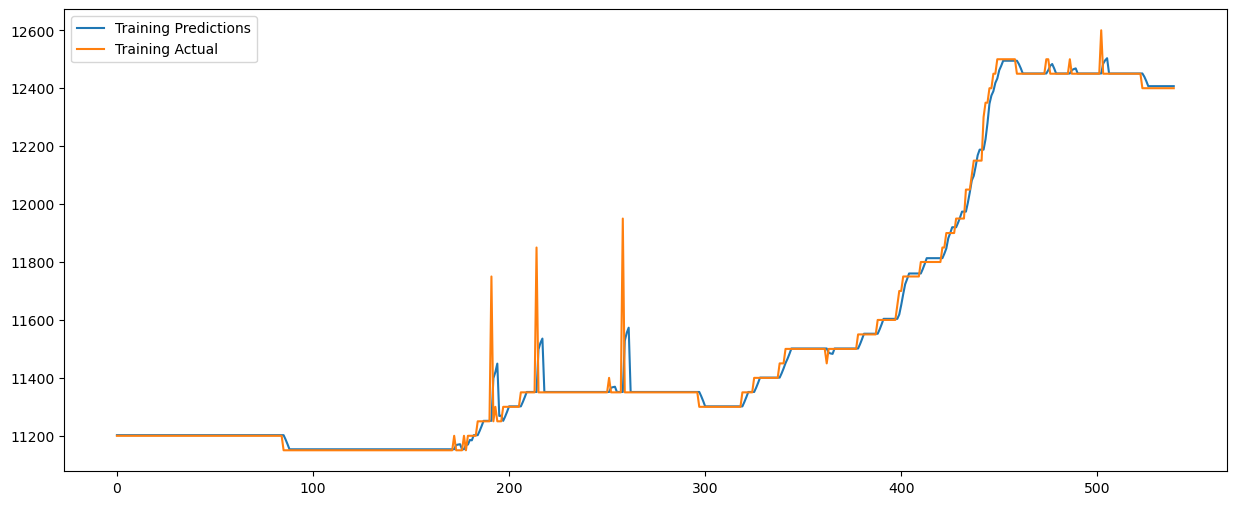

In [12]:
train_predictions = model.predict(X_train).flatten()
train_predictions_inv = scaler.inverse_transform(train_predictions.reshape(-1,1))

plt.plot(train_predictions_inv)
plt.plot(scaler.inverse_transform(y_train.reshape(-1,1)))
# plt.plot(dates_train, train_predictions)
# plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Actual'])

5/5 [==============================] - 0s 854us/step


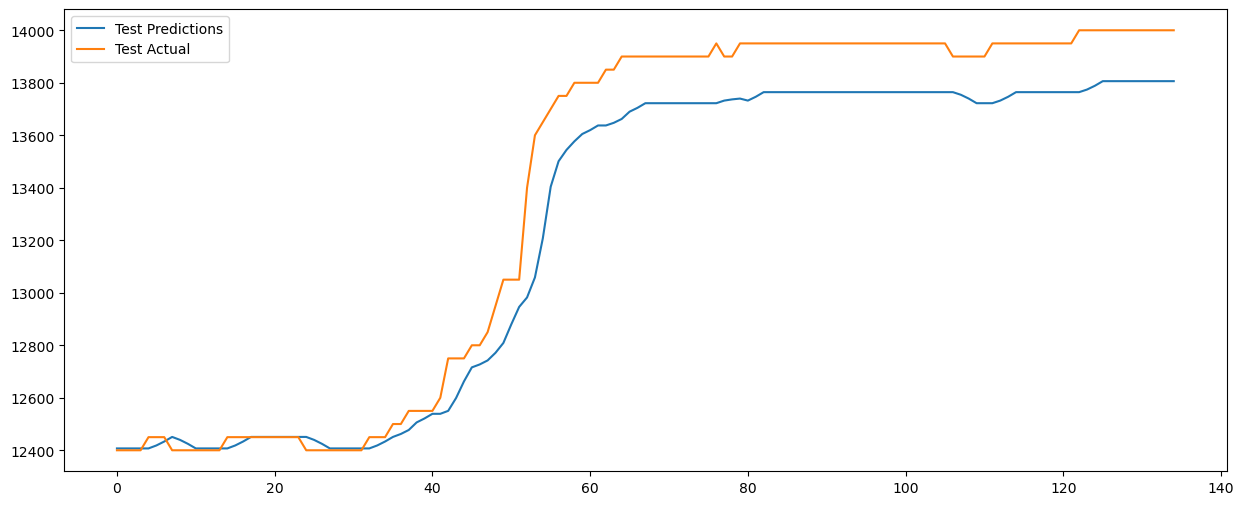

In [13]:
test_predictions = model.predict(X_test).flatten()
test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1,1))
y_test_inv = scaler.inverse_transform(y_test)

plt.plot(test_predictions_inv)
plt.plot(y_test_inv)
plt.legend(['Test Predictions', 'Test Actual'])

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

rmse = sqrt(mean_squared_error(test_predictions_inv,y_test_inv))
mae = mean_absolute_error(test_predictions_inv,y_test_inv)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)

# R Square
r = r2_score(test_predictions_inv,y_test_inv)

# Mean Magnitude of Relative Error
mmre = (abs((test_predictions_inv - y_test_inv) / y_test_inv)).mean()

# Median Magnitude of Relative Error
mdmre = np.median(abs((test_predictions_inv - y_test_inv) / y_test_inv))

# Mean Magnitude of Error Relative
mmer = (abs(test_predictions_inv - y_test_inv)).mean()

# Mean Square Error
mse = mean_squared_error(test_predictions_inv, y_test_inv)

# Menampilkan hasil
print("R Square: {:.4f}".format(r))
# print("Mean Magnitude of Relative Error: {:.4f}".format(mmre))
# print("Median Magnitude of Relative Error: {:.4f}".format(mdmre))
# print("Mean Magnitude of Error Relative: ", mmer)
print("Mean Square Error:", mse)

Root Mean Square Error: 170.21257800309436
Mean Absolute Error: 141.2342881944447
R Square: 0.9217
Mean Square Error: 28972.321710459488
